<a href="https://colab.research.google.com/github/hihunjin/Code-snippet-for-everything/blob/main/Netwokx%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%98%EC%97%AC_%EB%B6%84%EC%9E%90%EA%B5%AC%EC%A1%B0_%EA%B7%B8%EB%A6%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netwokx를 활용하여 분자구조 그리기

참조 : https://devocean.sk.com/blog/techBoardDetail.do?ID=163644

In [3]:
!pip install rdkit-pypi networkx

     |████████████████████████████████| 20.6 MB 1.6 MB/s 


In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import MolsToImage
from rdkit.Chem.Draw import MolToFile
import networkx as nx
import matplotlib.pyplot as plt


In [5]:
smiles = "CC(=O)OC1=CC=CC=C1C(=O)O"

In [6]:
mol = Chem.MolFromSmiles(smiles)

간단하게 RDKit으로 아스피린이라는 물질의 분자 구조를 그려볼 수 있다.

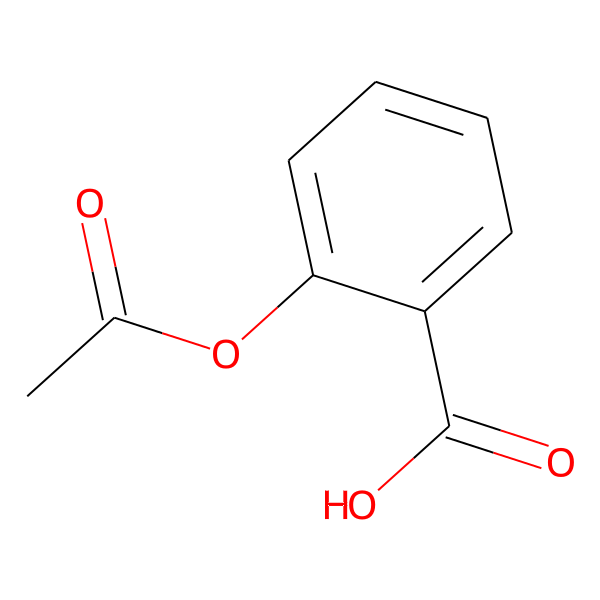

In [7]:
MolsToImage(mols=[mol], subImgSize=(600,600))

그럼 다음에는 Networkx 로 분자구조를 그려보도록 한다.

그러기 위해서는 mol을 networkx 그래프로 전환해야 한다.

원자 정보는 필요한 것만 골라서 노드 정보에 담으면 된다.

In [8]:
def mol_to_nx(mol):
    G = nx.Graph()

    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(),
                   labels=atom.GetSymbol(),
                   atomic_num=atom.GetAtomicNum(),
                   formal_charge=atom.GetFormalCharge(),
                   chiral_tag=atom.GetChiralTag(),
                   hybridization=atom.GetHybridization(),
                   num_explicit_hs=atom.GetNumExplicitHs(),
                   is_aromatic=atom.GetIsAromatic())
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(),
                   bond.GetEndAtomIdx(),
                   bond_type=bond.GetBondType(),
                   bond_type_value=bond.GetBondTypeAsDouble())
    return G

G = mol_to_nx(mol)

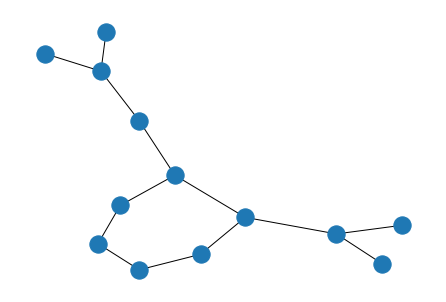

In [9]:
nx.draw(G)

그렇다면 노드에 레이블을 넣어 보고 싶은 마음이 생길 것이다.

with_labels = True 설정으로 노드 id값이 기본적인 노드 레이블로 사용되어 보여진다.

참고적으로 spring_layout으로 인해 로딩할 때 마다 이미지가 변경될 것이다.

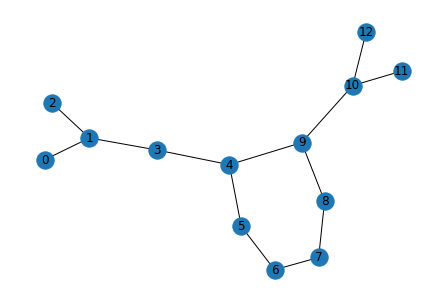

In [10]:
nx.draw(G,pos=nx.spring_layout(G) ,with_labels = True)

다음에는 kamada_kawai_layout 을 사용해서 레이아웃을 변경하고

노드 id 말고 위에서 노드 값에 넣어둔 심볼명을 노드 레이블로 생성하도록 하겠다.

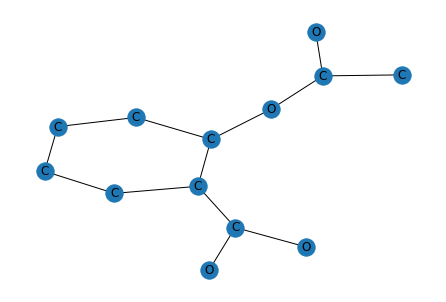

In [11]:
nx.draw(G, pos=nx.kamada_kawai_layout(G),  labels={node: G.nodes()[node]['labels'] for node in G.nodes()})

노드 색과, 링크를 변경

In [12]:
nColors =[G.nodes()[node]['atomic_num'] for node in G.nodes()]
color_set = list(set(nColors))
nColors = [color_set.index(n) for n in nColors]

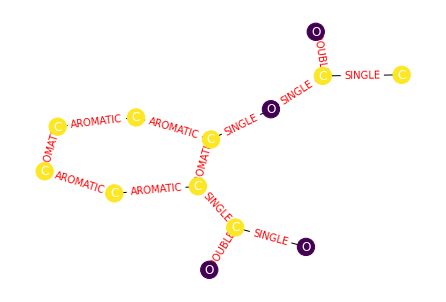

In [13]:
plt.figure()
nx.draw(G, pos=nx.kamada_kawai_layout(G), node_color=nColors, 
        labels={node: G.nodes()[node]['labels'] for node in G.nodes()},
       font_color='white')
nx.draw_networkx_edge_labels(
    G, pos=nx.kamada_kawai_layout(G),
    edge_labels=dict(((e[0], e[1]), f'{e[2]["bond_type"]}') for e in G.edges(data=True)),
    font_color='red'
)
plt.axis('off')
plt.show()